<a href="https://colab.research.google.com/github/90sSnowfall/Apprenticeship-Band-Website/blob/main/mib_lab1_SOLVED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laborator 1.

Algoritmii metaeuristici sunt algoritmi de optimizare care utilizează euristici pentru a explora spațiul soluțiilor și a găsi soluții bune sau aproape optime pentru problemele de optimizare. Acești algoritmi sunt concepuți să optimizeze procesul de optimizare, adică să găsească soluții bune într-un timp rezonabil, prin utilizarea principiilor de căutare euristice, adaptarea procesului de căutare prin modificarea parametrilor de control, explorarea aleatorie a spațiului de soluții și utilizarea unor mecanisme de decizie care permit algoritmului să evite soluțiile neoptime.

Acești algoritmi sunt utilizați pentru a rezolva probleme de optimizare care sunt dificil de rezolvat prin metode clasice de optimizare, precum programarea [liniară](http://gheorghe-grigoras.ieeia.tuiasi.ro/SDOE/5_Programarea%20LINIARA.pdf), convexă sau [neliniară](http://gheorghe-grigoras.ieeia.tuiasi.ro/SDOE/6_Programarea%20NELINIARA.pdf), cum ar fi unele probleme de optimizare complexe care implică multe variabile și constrângeri în domenii variate, precum inginerie, finanțe, medicină, transport și logistică, planificare și programare. Algoritmii metaeuristici sunt capabili să găsească soluții bune și pentru problemele care implică incertitudine sau variabilitate, ceea ce face ca acești algoritmi să fie foarte utili în domeniile în care este nevoie de optimizare în timp real.

În general, motivul pentru utilizarea algoritmilor metaeuristici este acela că acești algoritmi sunt capabili să găsească soluții bune sau aproape optime pentru probleme complexe de optimizare într-un timp rezonabil, ceea ce face ca acești algoritmi să fie foarte utili în multe domenii diferite.

## Explorarea și exploatarea

Explorarea și exploatarea sunt două concepte importante în contextul algoritmilor metaeuristici.

Explorarea se referă la căutarea în întregul spațiu de soluții în căutarea unor soluții noi sau inedite. Aceasta implică o căutare mai aleatorie și mai largă a spațiului de soluții, adesea prin încercarea unor noi combinații de soluții și explorarea unor părți mai puțin frecvente ale spațiului de soluții. În general, explorarea este mai importantă la începutul procesului de optimizare, atunci când algoritmul încearcă să identifice soluții potențial bune.

Exploatarea se referă la folosirea soluțiilor existente și găsite anterior pentru a găsi soluții mai bune sau optime. Aceasta implică o căutare mai concentrată și mai intensivă a spațiului de soluții, cu o atenție mai mare acordată soluțiilor care s-au dovedit a fi bune sau aproape optime. În general, exploatarea este mai importantă pe măsură ce procesul de optimizare continuă, deoarece algoritmul se concentrează asupra îmbunătățirii soluțiilor găsite anterior.

Pentru a găsi soluții bune sau aproape optime, algoritmii metaeuristici trebuie să echilibreze explorarea și exploatarea. O strategie eficientă de căutare implică o explorare intensivă în primele etape ale procesului de optimizare, urmată de o combinație echilibrată de exploatare și explorare pe măsură ce procesul continuă.


## Exemplu

Optimizarea bazată pe gradient presupune că putem calcula prima (sau chiar a doua) derivată a funcției obiectiv. În multe cazuri funcțiile nu sunt diferențiabile în orice punct, sau sunt puternic multimodale, perturbate de zgomot etc.

Chiar și în cazuri în care dispunem de gradient și abordăm o funcție simplă 1D, aceste metode se pot împotmoli în cel mai apropiat optim local. De exemplu, funcția $$ f(x) = x^4 + 5x^3 + 4x^2 - 4x + 1$$ are doar două minime locale, în $x=0.31$ și $x=-2.96$, cel din urmă fiind și minimul global. Totuși, metoda standard [`scipy.optimize.minimize_scalar`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html) de cele mai multe ori nu va găsi minimul global. Acest fapt se poate verifica empiric, rulând in repetate rânduri următoarea celulă cod.



Minim localizat in punctul x=0.3077914272615743


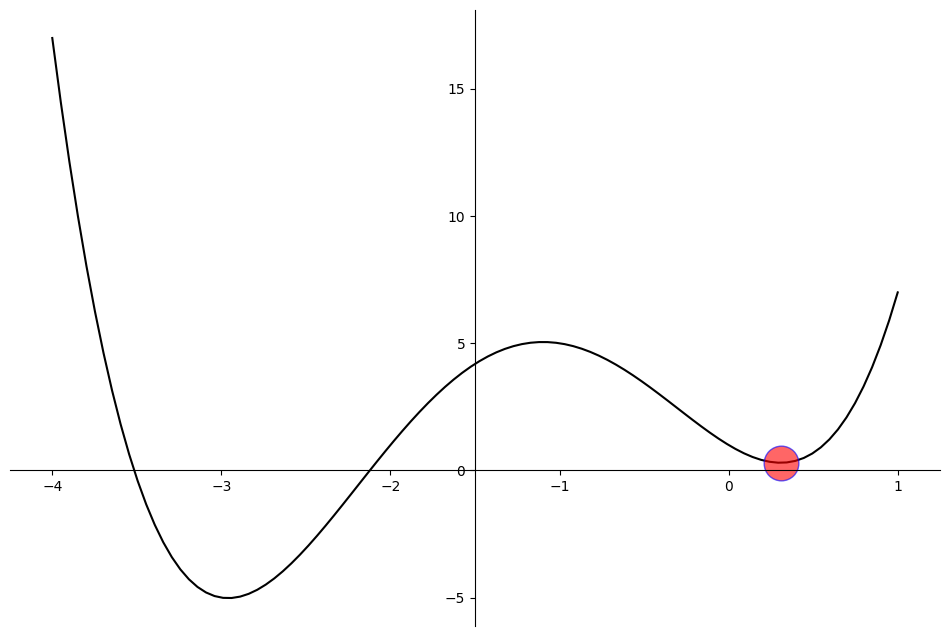

In [ ]:
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import numpy as np

def plot_function(fun, lb=-10, ub=10, resolution=100, show=True):
  x = np.linspace(lb, ub, resolution)
  y = np.zeros(len(x))

  for i in range(len(x)):
    y[i] = fun(x[i])


  # setting the axes at the centre
  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_subplot(1, 1, 1)
  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  plt.plot(x, y, 'k')

  if show:
    plt.show()

def optimize_and_plot(fun, lb=-10, ub=10, method=minimize_scalar):
  # minime function
  res = method(fun)

  print(f'Minim localizat in punctul x={res.x}')

  plot_function(fun, lb, ub, show=False)

  plt.plot(res.x, res.fun, marker="o", markersize=25, markeredgecolor="blue", markerfacecolor="red", alpha = 0.6)
  plt.show()


def f1(x):
  return x ** 4 + 5 * x ** 3 + 4 * x ** 2 - 4 * x + 1

optimize_and_plot(f1, -4, 1)


Situația este doar înrăutățită dacă funcția este perturbată de un zgomot semnificativ, gradientul numeric calculat în fiecare pas fiind incorect.

Minim localizat in punctul x=0.5322950229581676


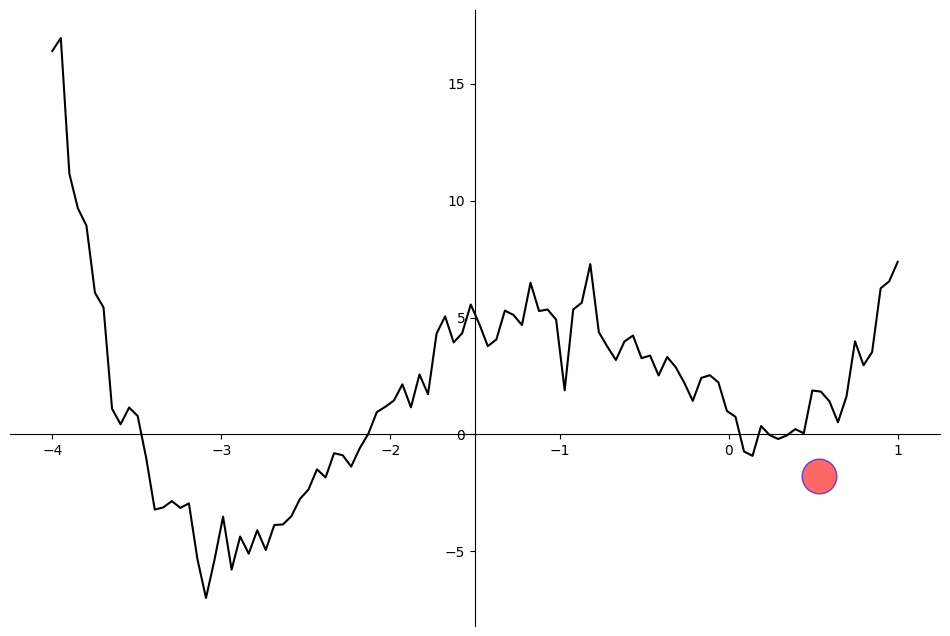

In [ ]:
def f1_noisy(x):
    # additive gaussian noise
    return f1(x) + np.random.normal(0, 1)

optimize_and_plot(f1_noisy, -4, 1)

Iar aceste metode prin definiție sunt neadecvate pentru funcții nediferențiabile în unele regiuni.

Minim localizat in punctul x=-1.6180339754913822


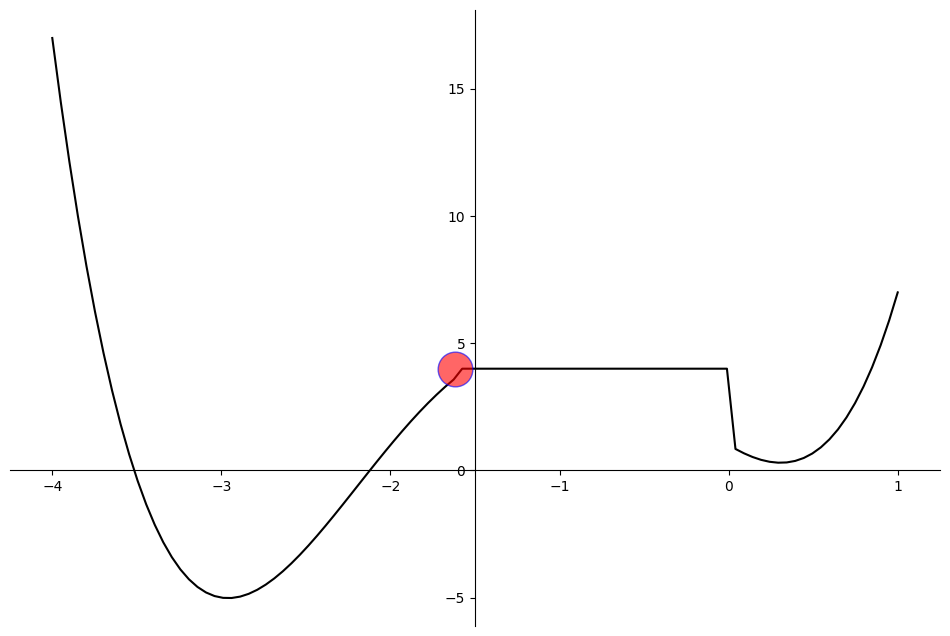

In [ ]:
def f1_picewise_non_diff(x):
  if x < -1.62 or x > -0:
    return f1(x)

  return 4

optimize_and_plot(f1_picewise_non_diff, -4, 1)

Pe lângă toate aceste impedimente, pentru foarte multe cazuri și probleme reale, nu cunoaștem sau dispunem nici măcar de descrierea formală a funcției. De ex. în cazuri în care rezultatul este dat de o serie de măsurători sau simulări.
În acest scenariu de ["cutie neagră"](https://www.lix.polytechnique.fr/~dambrosio/blackbox_material/Cassioli_1.pdf) dispunem doar de o modalitate de a crea sau modifica intrările $x_1 \dots x_d$ pentru funcția necunoscută, și de a observa rezultatul $y$ și "calitatea" acestuia, descris de o [funcție obiectiv](https://en.wikipedia.org/wiki/Loss_function) (denumit și fitness, funcție cost, energie etc.) $objFunc(y)$.

![](https://www.researchgate.net/profile/Nacim_Belkhir/publication/322035981/figure/fig1/AS:574906124910592@1514079709331/black-box-Optimization.png)

Fig. 1. Optimizare black-box.

# Căutare locală, metode traiectorie

[Căutare locală](https://en.wikipedia.org/wiki/Local_search_(optimization)) are ca scop găsirea soluției optime (ce minimizează sau maximizează funcția obiectiv) în [vecinătatea](https://en.wikipedia.org/wiki/Neighbourhood_(mathematics)) unei soluții inițiale $x$.

Algoritmii de căutare locală se deplasează de la soluție la soluție în spațiul soluțiilor posibile (spațiul de căutare) prin aplicarea repetată a unor perturbări, modificări locale. Astfel, pe parcursul rulării, acești algoritmi descriu o "traiectorie" în spațiul de căutare.

## Random Search

Aceste [metode](https://en.wikipedia.org/wiki/Random_search) generează aleatoriu soluții din spațiul de căutare, și returnează aceea care obține evaluarea cea mai bună (conform fucției obiectiv).

```
t = 0;
result = createNewSolution();
evaluate(result);
while notFinished(t) do
    a = createNewSolution();
    evaluate(a);
    if a isBetterThan result then
      result = a;
    t = t+1;
end_while
```


Iată o exemplificare a metodei pe funcțiile mai sus definite.

Minim localizat in punctul x=-2.960014838405387


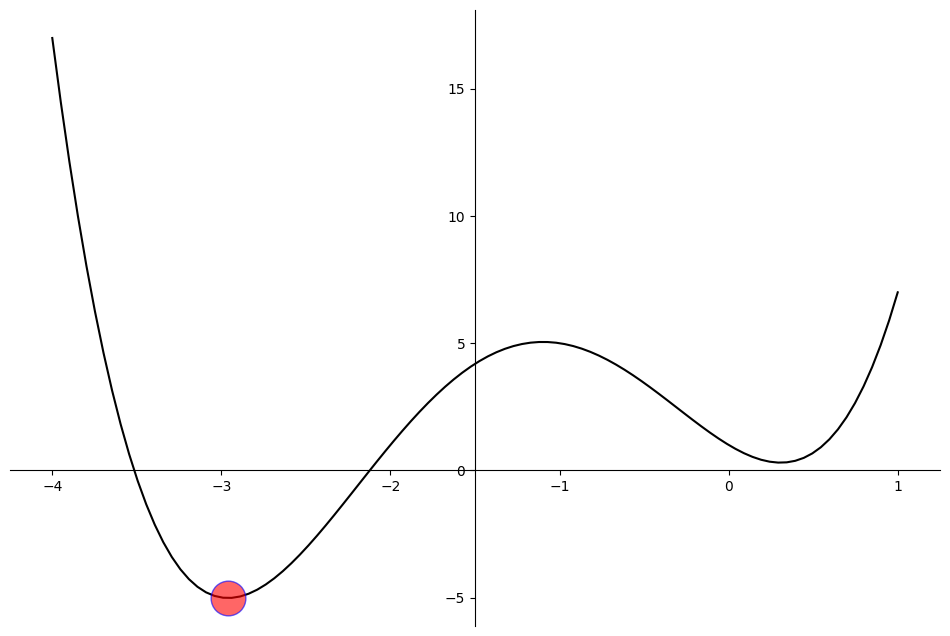

Minim localizat in punctul x=-2.9190700165245063


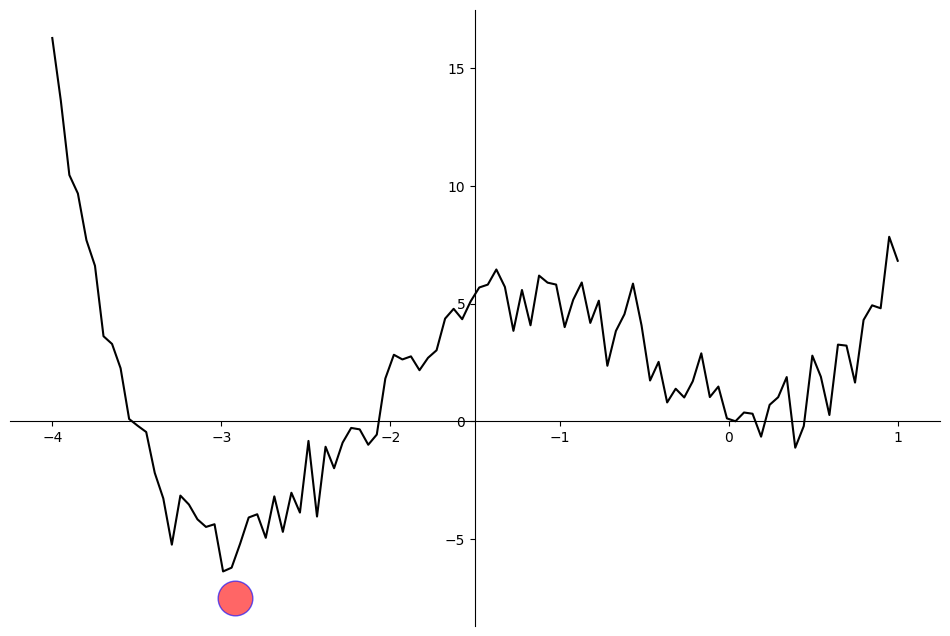

Minim localizat in punctul x=-2.9617160094463433


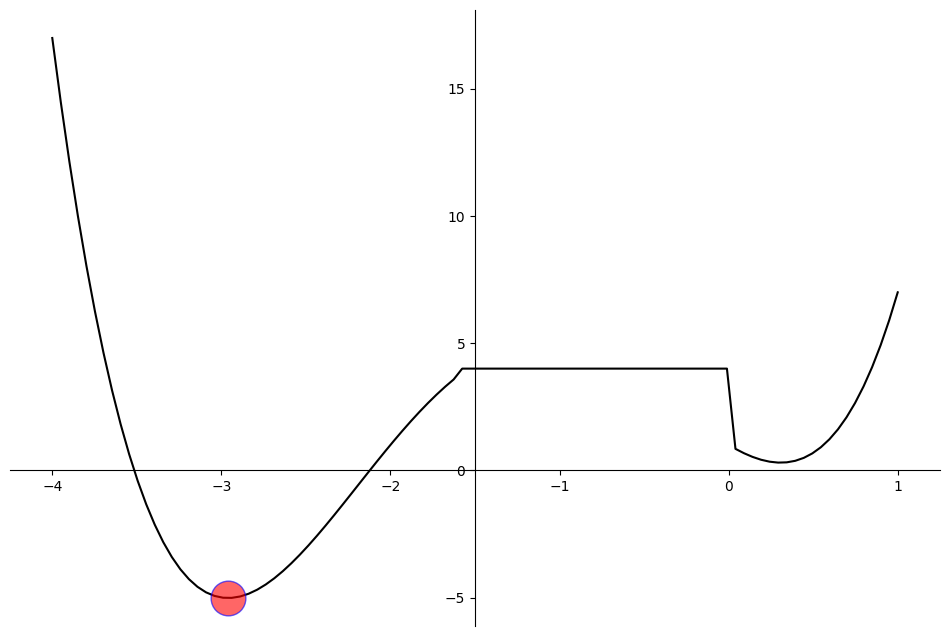

In [ ]:
from locale import resetlocale

class res_struct:
    x = 0.0
    fun = 0.0

def random_search(fun, lb=-10, ub=10, num_tries=10000):
  best_x = np.random.uniform(lb, ub)
  best_fval = fun(best_x)

  for i in range(num_tries):
    x = np.random.uniform(lb, ub)
    x_fval = fun(x)

    if x_fval < best_fval:
      best_fval = x_fval
      best_x = x

  res = res_struct()
  res.x = best_x
  res.fun = best_fval

  return res

mw = lambda x : random_search(x, -4, 1)

optimize_and_plot(f1, -4, 1, method=mw)
optimize_and_plot(f1_noisy, -4, 1, method=mw)
optimize_and_plot(f1_picewise_non_diff, -4, 1, method=mw)

Deși metoda are succes pe aceste funcții simple, ea nu este scalabilă. Odată cu creșterea numărului dimensiunilor și a intervalelor de definiție, probabilitatea localizării optimului global prin eșantionare uniformă aleatorie descrește exponențial.

## Hill Climbing / Hill Descending
Este o familie de metode iterative ce realizează o căutare locală,
denumită și Îmbunătățire iterativă ([Iterative Improvement](https://www.ocf.berkeley.edu/~shidi/cs61a/wiki/Iterative_improvement#:~:text=Iterative%20improvement%20is%20a%20technique,%3D%20update(guess)%20return%20guess)). Metoda printr-un operator de perturbație, modificare aleatorie actualizează-îmbunătățește o soluție inițială, până când ajungem la soluția optimă (sau bugetul de timp alocat calculului, numărul maxim de încercări prestabilite este depășit).

```
t = 0;
result = createNewSolution();
evaluate(result);
while notFinished(t) do
    a = clone(result);
    mutate(a);
    evaluate(a);
    if a isBetterThan result then
      result = a;
   t = t+1;
end_while
```


Deseori se utilizează varianta iterată (Iterated Hill Climbing), în care algoritmul este repornit cu o soluție inițială nouă, pentru a mări gradul de explorare a spațiului de căutare.

Minim localizat in punctul x=-2.9603419844491192


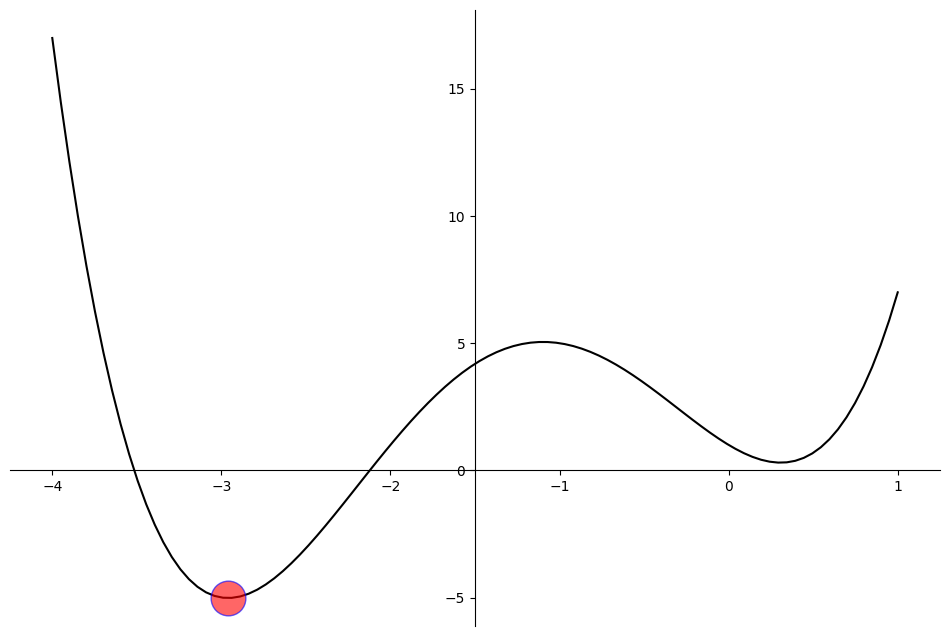

Minim localizat in punctul x=-2.8572475878091232


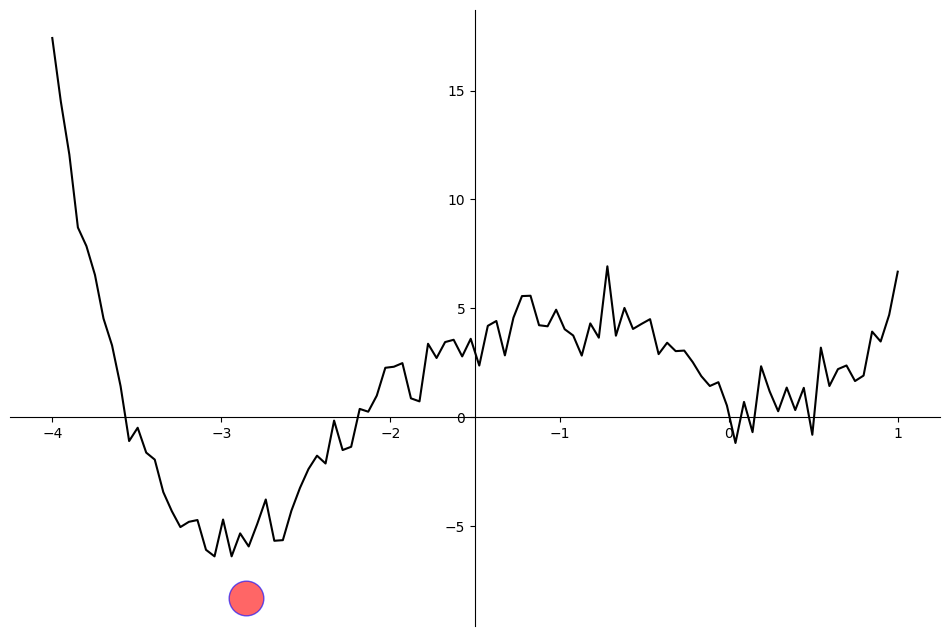

Minim localizat in punctul x=-2.9601916204728336


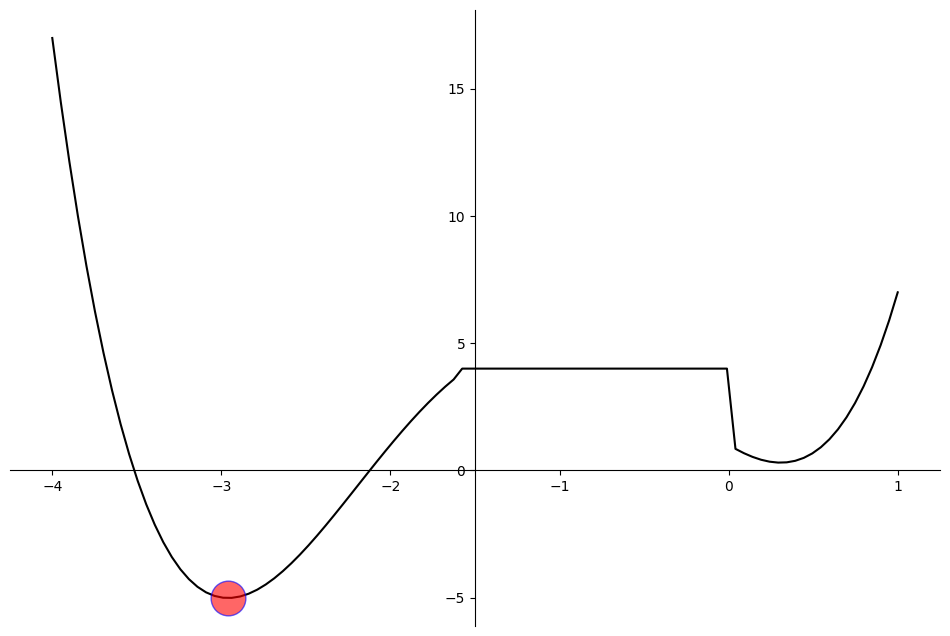

In [ ]:
def random_perturbation_hd(fun, lb=-10, ub=10, num_tries=10000, perturbation_magnitude=1):
  best_x = np.random.uniform(lb, ub)
  best_fval = fun(best_x)

  for i in range(num_tries):
    # local perturbation
    x = best_x + np.random.normal(0, perturbation_magnitude)
    x_fval = fun(x)

    if x_fval < best_fval:
      best_fval = x_fval
      best_x = x

  res = res_struct()
  res.x = best_x
  res.fun = best_fval

  return res

mw = lambda x : random_perturbation_hd(x, -4, 1)

optimize_and_plot(f1, -4, 1, method=mw)
optimize_and_plot(f1_noisy, -4, 1, method=mw)
optimize_and_plot(f1_picewise_non_diff, -4, 1, method=mw)

Principala provocare la folosirea acestor metode constă în buna alegere a parametrizării, în acest caz a operatorului de perturbație. De exemplu, cu o perturbație foarte mică scade puterea de explorare a metodei, iar rezultatele obișnuite nu mai sunt la fel de stabile (rulați următoarea celulă cod în mod repetat).

Minim localizat in punctul x=-2.960276064744664


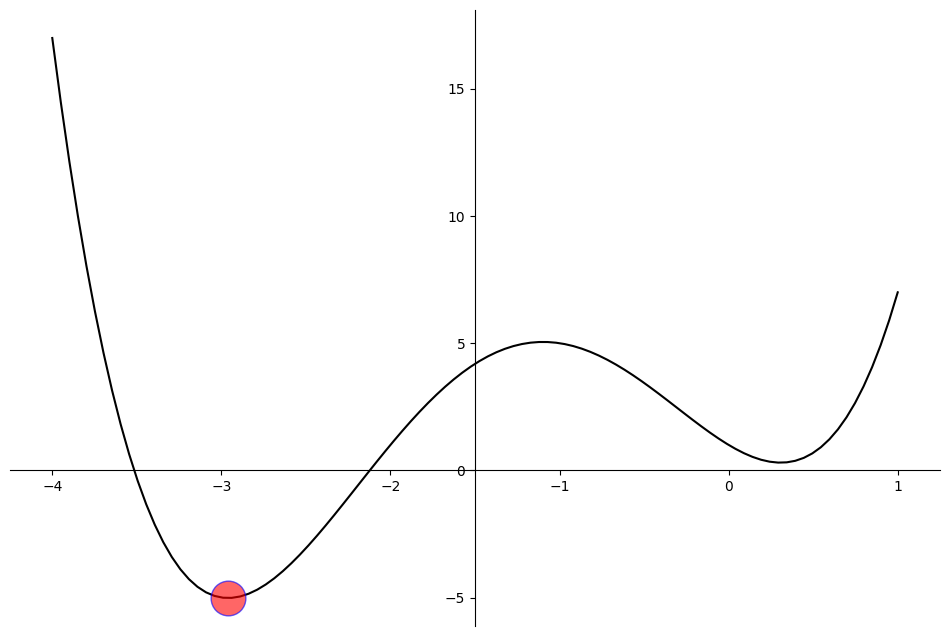

Minim localizat in punctul x=-3.4723681774003192


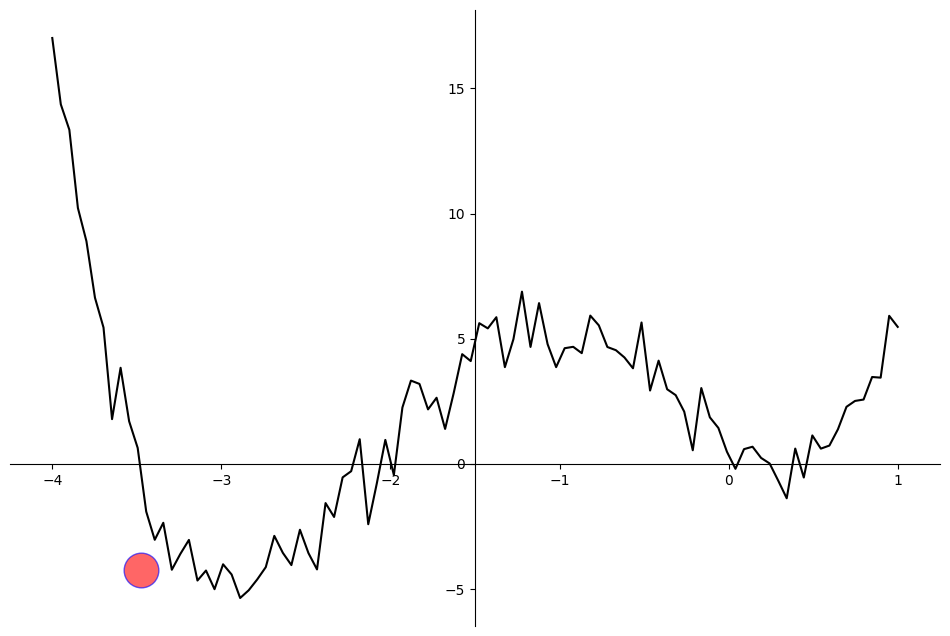

Minim localizat in punctul x=-2.960275042844763


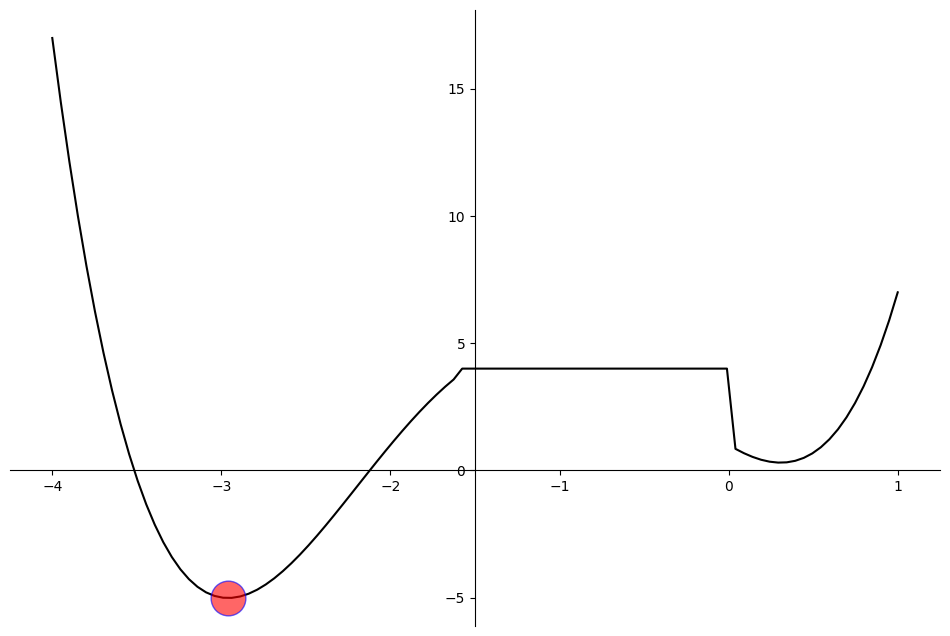

In [ ]:
mw = lambda x : random_perturbation_hd(x, -4, 1, perturbation_magnitude=0.01)

optimize_and_plot(f1, -4, 1, method=mw)
optimize_and_plot(f1_noisy, -4, 1, method=mw)
optimize_and_plot(f1_picewise_non_diff, -4, 1, method=mw)

# Exerciții

## Exercițiul 1
Vom aborda o problemă cu funcție obiectiv discretă. Vom încerca să ghicim o parolă (secvență de caractere presupus necunoscută) cu aceste metode, având la dispoziție o funcție care ne indică câte caractere din șirul presupus se potrivesc cu parola (dar nu și poziția acestora).

In [ ]:
import random
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
random.seed(2001)

In [ ]:
alphabet = 'abcdefghijklmnopqrstuvwxyz0123456789'
target = 'mib2023'
target_length = len(target)

Avem nevoie de o metodă care să genereze aleatoriu dint-un alfabet, un șir de caractere de lungine specificată.

In [ ]:
def generateRandomSolution(length, alphabet):
    # TO DO sol = randomly choose length characters from alphabet
    sol = random.choices(alphabet, k=length)
    return ''.join(sol)

Testarea funcției.

In [ ]:
# generate random solutions of increasing lengths
for i in range(2,10):
  print(generateRandomSolution(i, alphabet))

vn
bx8
vu0w
wjfxd
7pxmn7
qjzqiwe
24fh7k2x
lyal390m7


Funcția obiectiv va specifica pentru o solțtie propusă, câte caractere se potrivesc, sunt la locul lor.

In [ ]:
def objFuncNumMatches(guess): # objective function, also called, fitness, energy etc.
    # TO DO return the number of matches between guess and target
    return sum(g == t for g, t in zip(guess, target))

Testarea funcției obiectiv.

In [ ]:
objFuncNumMatches(target)

7

In [ ]:
# generate random solutions and calculate their "fitness" (objective function value that we are maximizing)
for i in range(0,100):
  ind = generateRandomSolution(target_length, alphabet)
  fitness = objFuncNumMatches(ind)
  print('Solutia {0} are fitness-ul de: {1}'.format(ind, fitness))

Solutia w63tmr1 are fitness-ul de: 0
Solutia j02m1c5 are fitness-ul de: 0
Solutia 7qn3lnf are fitness-ul de: 0
Solutia gdhyc8h are fitness-ul de: 0
Solutia ib26lcc are fitness-ul de: 0
Solutia 0mva5ya are fitness-ul de: 0
Solutia 2pg41we are fitness-ul de: 0
Solutia ei6cci5 are fitness-ul de: 1
Solutia rpqfdua are fitness-ul de: 0
Solutia 4l65mw8 are fitness-ul de: 0
Solutia q0d0ctb are fitness-ul de: 0
Solutia vc51l55 are fitness-ul de: 0
Solutia 8dmoedp are fitness-ul de: 0
Solutia tgsjls0 are fitness-ul de: 0
Solutia c1vadmy are fitness-ul de: 0
Solutia jt6w0fi are fitness-ul de: 1
Solutia bgpxnj5 are fitness-ul de: 0
Solutia kavcrku are fitness-ul de: 0
Solutia u1ju80c are fitness-ul de: 0
Solutia vdz84wx are fitness-ul de: 0
Solutia 76280et are fitness-ul de: 1
Solutia cksnu9v are fitness-ul de: 0
Solutia zxnb0g6 are fitness-ul de: 1
Solutia 7aep4sh are fitness-ul de: 0
Solutia x1z95qp are fitness-ul de: 0
Solutia jadsk25 are fitness-ul de: 1
Solutia pfkzd1e are fitness-ul de: 0
S

### E1 a.
Generați 10000000 de soluții și calculați calitatea acestora.

- Care este timpul de rulare?
- Care este distribuția valorilor de calitate?
- Cât de des se potrivesc cel puțin 4 caractere?



### Răspuns
........

Elapsed time: 0:00:39.481589
[8.209453e+06 1.643445e+06 1.402790e+05 6.653000e+03 1.690000e+02
 1.000000e+00 0.000000e+00]


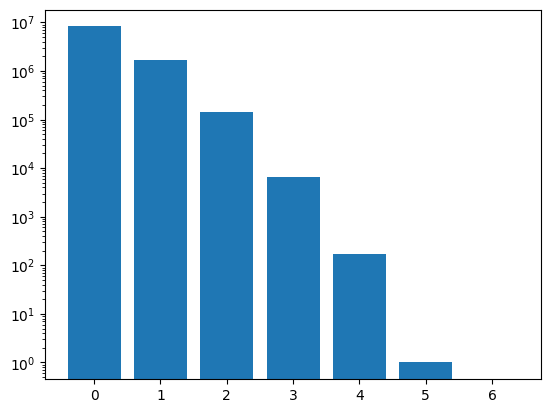

In [ ]:
hist = np.zeros(target_length)
startTime = datetime.datetime.now()

# TO DO generate and meassure solution's quality

trials = 10_000_000

for i in range(0,trials):
  ind = generateRandomSolution(target_length, alphabet)
  fitness = objFuncNumMatches(ind)
  hist[fitness] += 1

endTime = datetime.datetime.now()

print('Elapsed time: {0}'.format(str(endTime-startTime)))

print(hist)
plt.bar(range(0,target_length),hist)
plt.yscale('log')

In [ ]:
1000/10000000

0.0001

### E1 b.
Implementați operatori de perturbație-modificare pentru o soluție în care:
- Se schimbă un caracter, îm mod aleatoriu.
- Caracterele sunt schimbate aleatoriu, cu o probabilitate specificată de utlizator.

In [ ]:
def randomSampleIndex(sol, index2Change):
  # TO DO
  sol_list = list(sol)
  old_char = sol_list[index2Change]
  new_char = random.choice(alphabet)

  #checking if the letters changed
  while new_char == old_char:
    new_char = random.choice(alphabet)

  sol_list[index2Change] = new_char
  return ''.join(sol_list)

In [ ]:
def mutateOneIndex(sol):
  # TO DO
  # choose index
  # mutate at index
  index2Change = random.randint(0, len(sol) - 1)
  return randomSampleIndex(sol, index2Change)

In [ ]:
def mutateWithProb(sol, mutProb):
  # TO DO
  #convert the solution string into a list, since string is immutable
  sol_list = list(sol)

  #for each character roll the dice,
  for i in range(len(sol_list)):
    # rolling the dice, it might mutate
    if random.random() < mutProb:
      # if the chance is right then we save the old character at the said index,


      # we take a random character from the alphabet
      old_char = sol_list[i]
      new_char = random.choice(alphabet)
      # we ensure the new random character isn't the same with the old one,
      while new_char == old_char:
        new_char == random.choice(alphabet)

      # then we make the change.
      sol_list[i] = new_char

    return ''.join(sol_list)

### E1 c.

Implementați metodele 'hillClimber' și 'hillClimberSteepestAcent' / 'hillClimberSteepestDescent' prezentate la curs.

- Care metodă și cu ce parametrizare are cele mai bune rezultate (pentru această problemă)?
- Oare cum se explică diferența de performanță?
- Pentru ce tipuri de probleme, rezultatul ar fi inversat (metoda mai slabă pe această problemă, să aibă o perfomranță mai bună)?

### Răspuns
........

In [ ]:
def hillClimber(maxIterations = 10000000, mutProb = 0.1):
  # TO DO

  # generates the list of solutions from the alphabet and tries to find matches with the target
  sol = generateRandomSolution(len(target), alphabet)
  bestFitness = objFuncNumMatches(sol)

  # for each solution we mutate the list of solutions with the probability mutProb
  # if the new fitness is better then we save the mutated list of characters
  for i in range(maxIterations):
    newSol = mutateOneIndex(sol, mutProb)
    newFitness = objFuncNumMatches(newSol)

    if newFitness > bestFitness:
      sol = newSol
      bestFitness = newFitness

  return sol, bestFitness

sol, bestFitness = hillClimber()
print(sol,bestFitness)

In [ ]:
def hillClimberSteepestAscent(maxIterations = 10000000, mutProb = 0.1):
   # TO DO
     # generates the list of solutions from the alphabet and tries to find matches with the target
    sol = generateRandomSolution(len(target), alphabet)
    bestFitness = objFuncNumMatches(sol)

    for i in range(maxIterations):

      # generating neighbours by mutating the current solution
      neighbours = []
      for _ in range(20):
        mutatedSol = mutateWithProb(sol, mutProb)
        neighbours.append(mutatedSol)

      # chosing best neighbour
      bestNeighbour = max(neighbours, key=objFuncNumMatches)
      bestNeighbourFitness = objFuncNumMatches(bestNeighbour)

      # if it's better then we're chosing that solution
      if bestNeighbourFitness > bestFitness:
        sol = bestNeighbour
        bestFitness = bestNeighbourFitness

      if bestFitness == len(target):
        break

    return sol,bestFitness

sol, bestFitness = hillClimberSteepestAscent()
print(sol,bestFitness)

## Exercițiul 2

În acest exercițiu vom vizualiza traiectoria descrisă de metodele de căutare locală într-un spațiu de căutare 2D, observând efectul și interacțiunea strategiilor de [explorare și exploatare](https://towardsdatascience.com/intuition-exploration-vs-exploitation-c645a1d37c7a).

Începem prin definirea unei metode ce afișează în 3D o funcție $z=f(x,y)$, cu posibilitatea setării [punctului de observare](https://matplotlib.org/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.view_init).

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import time

In [ ]:
def plotSurface(X, Y, Z, titleLabel = '', el = 35, az = 40, width = 20, height = 6, zmin = 0, zmax = 1, transparency = 1, reuseFig = False):

  if reuseFig:
    fig = plt.gcf()
    ax = plt.gca()
  else:
    fig = plt.figure(figsize=(width, height))
    ax = fig.add_subplot(111, projection='3d')

  surf = ax.plot_surface(X, Y, Z, cmap=cm.binary, alpha = transparency, linewidth=0.5, edgecolors='gray')

  ax.set_zlim(zmin, zmax)
  fig.colorbar(surf, shrink=0.5, aspect=5)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(titleLabel, fontsize=20)

  ax.elev = el
  ax.azim = az

  plt.show()

### Funcție unimodală

Ca prim exemplu, vom considera o funcție cu un singur maxim ([unimodală](https://en.wikipedia.org/wiki/Unimodality)). Metodele de îmbunătățire iterativă (hill-climbing) sunt foarte potrivite pentru optimizarea acestor funcții și vor converge ușor la maximul global.

![](https://upload.wikimedia.org/wikipedia/commons/0/05/Hill_climb.png)

Fig. 1. Funcție unimodală $z = f(x, y) = e^{-(x^2 + y^2)}$

In [ ]:
def objFuncUnimodal(x, y): # objective function, also called, fitness, energy etc.
    return np.exp(-(x*x+y*y))

Prezentarea funcției în 3D din diferite unghiuri

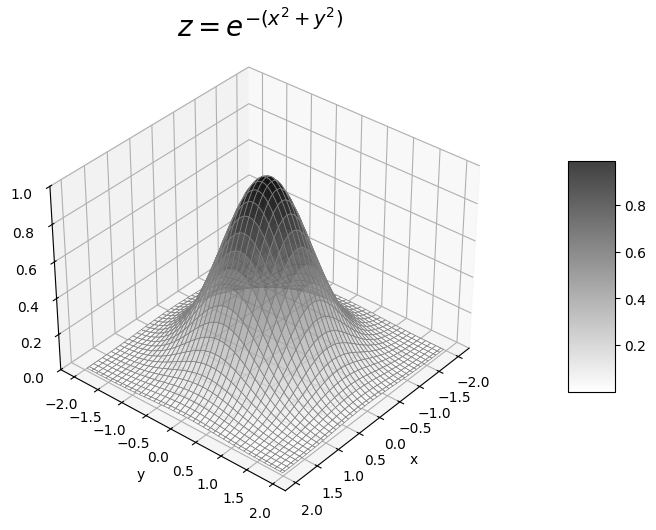

In [ ]:
vectorizedUnimodal = np.vectorize(objFuncUnimodal)

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Zu = vectorizedUnimodal(X,Y)

plotSurface(X, Y, Zu, '$z = e^{-(x^2 + y^2)}$', transparency=0.75)

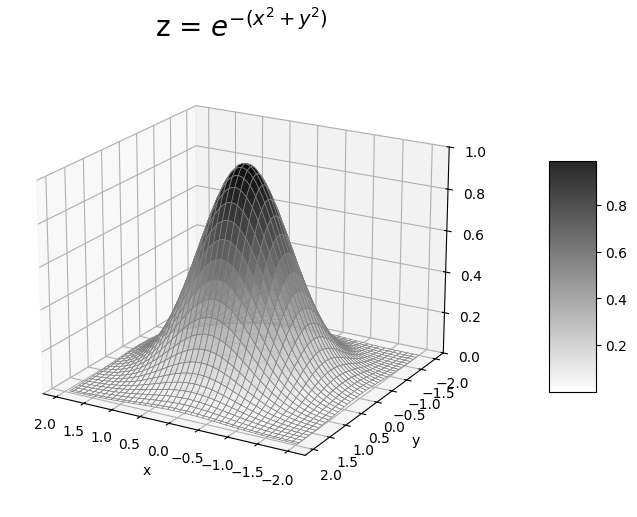

In [ ]:
# Same plot, another camera angle
plotSurface(X, Y, Zu, 'z = $e^{-(x^2 + y^2)}$', el=20, az = 120, transparency=0.85)

### Funcție mutimodală

În al doilea exemplu, considerăm o funcție cu două maxime locale ([multimodală](https://en.wikipedia.org/wiki/Multimodal_distribution)), dintre care numai unul este și maxim global. Metodele de îmbunătățire iterativă (hill-climbing) pot converge la maximul inferior dacă sunt pornite dintr-un punct ce se află departe de maximul global.

![](https://upload.wikimedia.org/wikipedia/commons/7/7e/Local_maximum.png)

Fig. 2. Funcție multimodală $z = f(x, y) = e^{-(x^2 + y^2)} + 2e^{-((x-1.7)^2 + (y-1.7)^2)}$

In [ ]:
def objFuncMultimodal(x, y):
    return np.exp(-(x*x+y*y)) + 2*np.exp(-( (x-1.7)**2 + (y-1.7)**2))

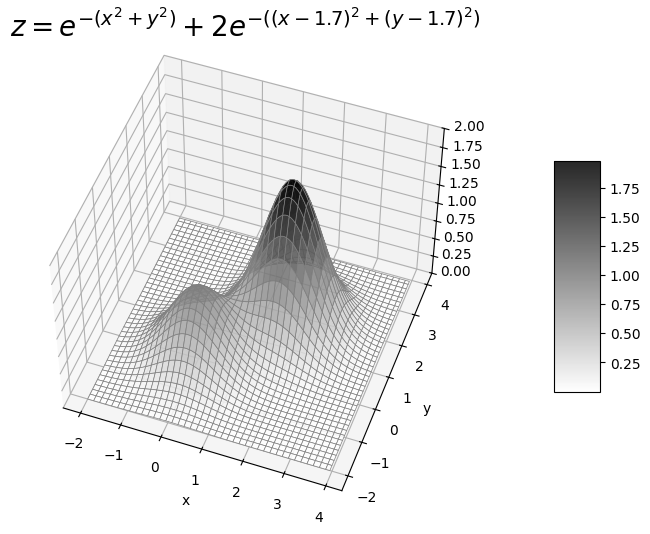

In [ ]:
vectorizedMultimodal = np.vectorize(objFuncMultimodal)
X = np.arange(-2, 4, 0.05)
Y = np.arange(-2, 4, 0.05)
X, Y = np.meshgrid(X, Y)
Zm = vectorizedMultimodal(X,Y)

plotSurface(X, Y, Zm, '$z = e^{-(x^2 + y^2)} + 2e^{-((x-1.7)^2 + (y-1.7)^2)}$', el=50, az = 290, zmax = 2, transparency=0.85)

În următoarea celulă, afisăm traiectoria descrisă de o eșantionare uniform aleatorie din spațiul de căutare. Cum se poate observa, metoda sare aleatoriu dint-un punct în altul.

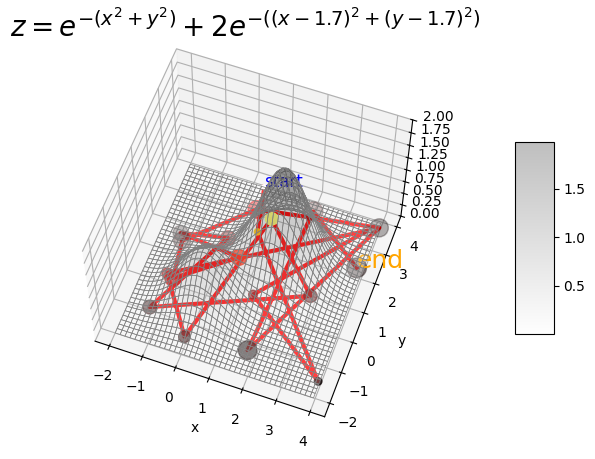

In [ ]:
# generate random solutions and calculate and display their "fitness" (objective function value that we are maximizing)
xs = np.random.uniform(-2, 4, 20)
ys = np.random.uniform(-2, 4, 20)

zs = vectorizedMultimodal(xs, ys) + 0.1 # positive offset to draw slightly above surface

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c=zs, marker='o', s=range(10, 10*21, 10), cmap=cm.hot)

ax.plot(xs, ys, zs, c='r', linewidth=3, alpha=1)
ax.text(xs[0], ys[0], zs[0], 'start', color='blue', fontsize = 12)
ax.text(xs[-1], ys[-1], zs[-1], 'end', color='orange', fontsize = 18)

plotSurface(X, Y, Zm, '$z = e^{-(x^2 + y^2)} + 2e^{-((x-1.7)^2 + (y-1.7)^2)}$', el=60, az = 290, zmax = 2, transparency=0.25, reuseFig = True)

plt.show()

### E2 a.

Adaptați metodele `randomSearch`, `hillClimbing` și `hillClimbingSteepestAscent` pentru optimizarea unor funcții în două variabile, de forma $f(x,y)$, și vizualizați traiectoria descrisă pentru cele două funcții (unimodal și multimodal) prezentate.


randomSearch:  (-0.12707502263126913, 0.0962425034821992, np.float64(0.974909453157493), [(-0.17487061333960008, 1.1249172353205301, np.float64(0.273619036519793)), (0.19168897768391258, 0.7517466192543543, np.float64(0.5477876080426408)), (-0.005823611287564923, -0.2938264780414168, np.float64(0.9172566978757652)), (-0.12707502263126913, 0.0962425034821992, np.float64(0.974909453157493))])
hillClimbing:  (0.3858480037847504, 0.05845174975815584, np.float64(0.858734668333055), [(2.4510345030588567, 0.028509911861935855, np.float64(0.0024580597733358093)), (1.1079203253224117, 1.0451575391344945, np.float64(0.09828914070651829)), (-0.41229613060917153, -0.49970824954493115, np.float64(0.6572463071813128)), (-0.40213512813625457, -0.3067316512645308, np.float64(0.7742991609851044)), (0.3858480037847504, 0.05845174975815584, np.float64(0.858734668333055))])
hillClimbingSteepestAscent:  (0.0029263621743616103, -0.00940425889592969, np.float64(0.9999030010237477), [(3.8265098640447146, 0.00

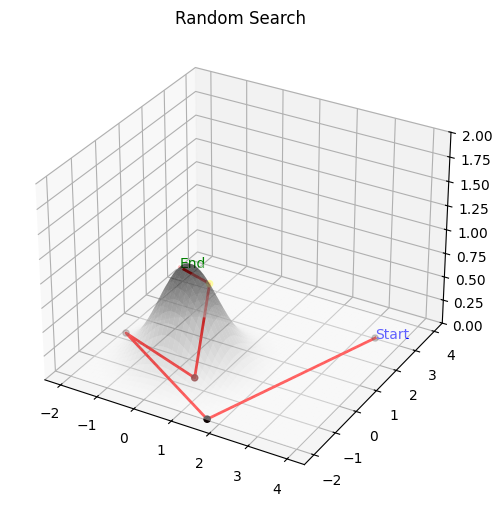

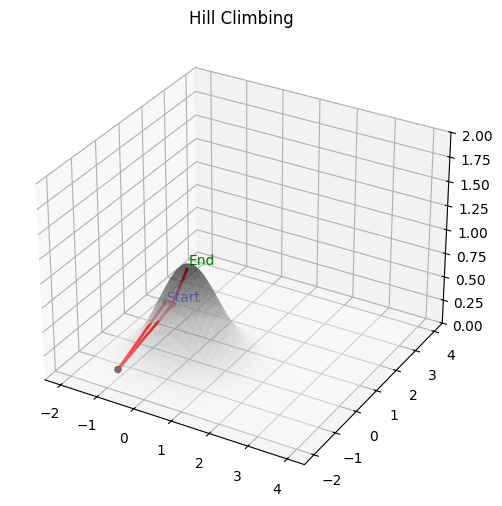

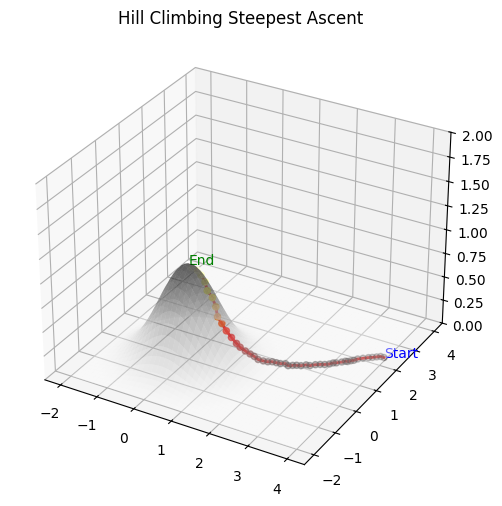

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import time
#global variables
maxIterations = 100

#modal functions
def objFuncUnimodal(x, y):
    return np.exp(-(x*x+y*y))

def objFuncMultimodal(x, y):
    return np.exp(-(x*x+y*y)) + 2*np.exp(-( (x-1.7)**2 + (y-1.7)**2))


def createNewSolution(bounds=(-2, 4)):
    x = random.uniform(*bounds)
    y = random.uniform(*bounds)
    return x, y

def mutate(x, y, bounds=(-0.1, 0.1)):
    return x + random.uniform(*bounds), y + random.uniform(*bounds)

def notFinished(t):
    return t < maxIterations

def randomSearch(objFunc):
    t = 0
    best_x, best_y = createNewSolution()
    best_z = objFunc(best_x, best_y)
    path = [(best_x, best_y, best_z)]

    while notFinished(t):
        a, b = createNewSolution()
        eval = objFunc(a, b)

        if eval > best_z:
            best_x, best_y, best_z = a, b, eval
            path.append((best_x, best_y, best_z))
        t += 1

    return best_x, best_y, best_z, path

def hillClimbing(objFunc):
    t = 0
    best_x, best_y = createNewSolution()
    best_z = objFunc(best_x, best_y)
    path = [(best_x, best_y, best_z)]

    while notFinished(t):
        a, b = createNewSolution()
        a, b = mutate(a, b)
        eval = objFunc(a, b)

        if eval > best_z:
            best_x, best_y, best_z = a, b, eval
            path.append((best_x, best_y, best_z))
        t += 1

    return best_x, best_y, best_z, path

def hillClimbingSteepestAscent(objFunc, neighborCount=20):
    t = 0
    best_x, best_y = createNewSolution()
    best_z = objFunc(best_x, best_y)
    path = [(best_x, best_y, best_z)]

    while notFinished(t):
        found_better = False
        candidate_x, candidate_y = best_x, best_y
        candidate_z = best_z

        for _ in range(neighborCount):
            new_x, new_y = mutate(best_x, best_y, bounds=(-0.1, 0.1))
            new_z = objFunc(new_x, new_y)

            if new_z > candidate_z:
                candidate_x, candidate_y, candidate_z = new_x, new_y, new_z
                found_better = True

        if found_better:
            best_x, best_y, best_z = candidate_x, candidate_y, candidate_z
            path.append((best_x, best_y, best_z))
        else:
            break

        t += 1

    return best_x, best_y, best_z, path

def plotTrajectory(path, X, Y, Z, title, zmax=2):
    xs, ys, zs = zip(*path)

    fig = plt.figure(figsize=(20, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(xs, ys, zs, c='red', linewidth=2)
    ax.scatter(xs, ys, zs, c=zs, cmap=cm.hot)

    ax.text(xs[0], ys[0], zs[0], 'Start', color='blue')
    ax.text(xs[-1], ys[-1], zs[-1], 'End', color='green')

    ax.plot_surface(X, Y, Z, cmap=cm.binary, alpha=0.4)
    ax.set_title(title)
    ax.set_zlim(0, zmax)
    plt.show()

print("randomSearch: ", randomSearch(objFuncUnimodal))
print("hillClimbing: ", hillClimbing(objFuncUnimodal))
print("hillClimbingSteepestAscent: ", hillClimbingSteepestAscent(objFuncUnimodal))

x = np.linspace(-2, 4, 100)
y = np.linspace(-2, 4, 100)
X, Y = np.meshgrid(x, y)
Z_uni = objFuncUnimodal(X, Y)

# Run each optimizer and get path
_, _, _, path_random = randomSearch(objFuncUnimodal)
_, _, _, path_hc = hillClimbing(objFuncUnimodal)
_, _, _, path_steep = hillClimbingSteepestAscent(objFuncUnimodal)

# Plot each
plotTrajectory(path_random, X, Y, Z_uni, "Random Search")
plotTrajectory(path_hc, X, Y, Z_uni, "Hill Climbing")
plotTrajectory(path_steep, X, Y, Z_uni, "Hill Climbing Steepest Ascent")

### E2 b.

Alegeți două funcții mutimodale din cele folosite în competiția [Special Session & Competition on Real-Parameter Single Objective (Expensive) Optimization at IEEE Conference on Evolutionary Computation, CEC-2014, Beijing, PR-China, 6-11 July 2014](http://www5.zzu.edu.cn/cilab/info/1005/1013.htm) și analizați performanța strategiilor de îmbunătățirie iterativă pe acestea. De câte rulări și evaluări ale funcției obiective este nevoie pentru a localiza în mod fiabil optimul global? Cum afectează creșterea numărului de dimensiuni dificultatea acestor probleme de căutare?

 Descrierea și prezentarea funcțiilor în detaliu:

 https://en.wikipedia.org/wiki/Test_functions_for_optimization

 și

 http://www5.zzu.edu.cn/__local/A/69/BC/D3B5DFE94CD2574B38AD7CD1D12_C802DAFE_BC0C0.pdf